# UTS: Processing Data PTA

In [57]:
import numpy as np
import pandas as pd

## Load Data

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/Lailyth611/PSD/main/DataOlah_Pta.csv')
df.head()

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['perancangan', 'implementasi', 'sistem', 'dat...",sistem informasi akademik siakad sistem inform...
1,1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['aplikasi', 'kontrol', 'monitoring', 'jaringa...",jalan koneksi jaring komputer lancar ganggu ha...
2,2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['rancang', 'bangun', 'aplikasi', 'proxy', 'se...",web server perangkat lunak server berfungsimen...
3,3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['sistem', 'pendukung', 'keputusan', 'optimasi...",jadwal kuliah guru kompleks masalah variabel t...
4,4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['sistem', 'augmented', 'reality', 'animasi', ...",iring kembang teknologi dunia muncul teknologi...


## Pre Processing Data

### Processing Data Null



#### Cek Data Null

In [59]:
df.isnull().sum()

Unnamed: 0        0
NPM               0
Judul             0
Abstrak           0
Prodi             0
Label             0
judul_tokens      0
abstrak_tokens    0
dtype: int64

Terdapat 25 data kosong pada abstrak dan 43 data kosong pada Label

#### Hapus Data Null

In [60]:
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

Unnamed: 0        0
NPM               0
Judul             0
Abstrak           0
Prodi             0
Label             0
judul_tokens      0
abstrak_tokens    0
dtype: int64

Menghapus data Kosong pada abstrak

#### Cek data not null

In [62]:
df.count()

Unnamed: 0        809
NPM               809
Judul             809
Abstrak           809
Prodi             809
Label             809
judul_tokens      809
abstrak_tokens    809
dtype: int64

Data yang tidak kosong berjumlah 810

#### Cek Jumlah Class Data

In [63]:
df['Label'].value_counts()

komputasi    572
RPL          198
PBA           39
Name: Label, dtype: int64

#### Grafik data Class

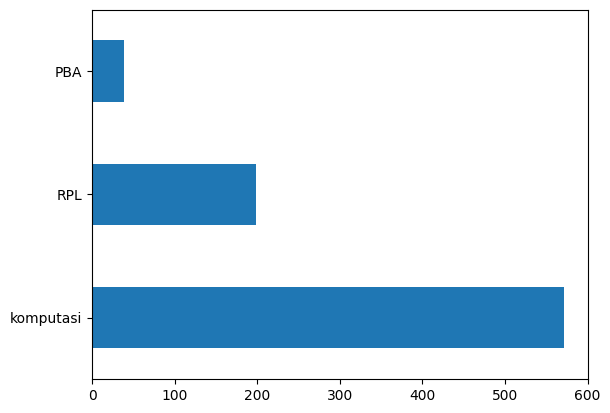

In [64]:
import matplotlib.pyplot as plt

df['Label'].value_counts().plot(kind='barh')
plt.show()

### Cleaning Text

In [65]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [66]:
# df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['perancangan', 'implementasi', 'sistem', 'dat...",sistem informasi akademik siakad sistem inform...
1,1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['aplikasi', 'kontrol', 'monitoring', 'jaringa...",jalan koneksi jaring komputer lancar ganggu ha...
2,2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['rancang', 'bangun', 'aplikasi', 'proxy', 'se...",web server perangkat lunak server berfungsimen...
3,3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['sistem', 'pendukung', 'keputusan', 'optimasi...",jadwal kuliah guru kompleks masalah variabel t...
4,4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['sistem', 'augmented', 'reality', 'animasi', ...",iring kembang teknologi dunia muncul teknologi...


#### Export Data Cleaning

In [67]:
# Export Hasil Text Cleaning
df.to_csv('PtaCleaning.csv')

### Menghapus Missing Value

In [68]:
# Ubah string kosong menjadi NaN value
df = df.replace('', np.nan)

In [69]:
# Cek missing values
df.isnull().sum()

Unnamed: 0        0
NPM               0
Judul             0
Abstrak           0
Prodi             0
Label             0
judul_tokens      0
abstrak_tokens    0
dtype: int64

In [70]:
# Menghapus Missing Value
df.dropna(inplace=True)
len(df)

809

### Menghapus Duplicate Value

In [71]:
df.drop_duplicates(subset=['Abstrak'], inplace=True)
df[df['Abstrak'].duplicated()]

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens


#### Cek Data Kolom Abstrak

In [72]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,Unnamed: 0,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens


In [73]:
# Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

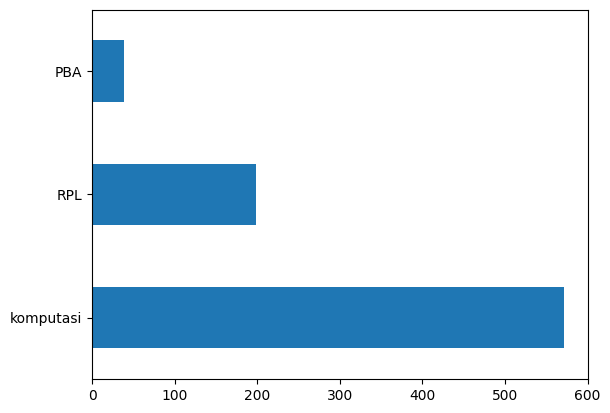

In [74]:
# Distribusi Kelas setelah Text Preprocessing
df['Label'].value_counts().plot(kind='barh')
plt.show()

### Tokenisasi
Memecah Kalimat Per kata

In [75]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

#### Tokenisasi Abstrak

In [76]:
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


### Menghapus Stop Word

In [77]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

# df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

### Stop Word Judul

In [79]:
# df[["Judul", "judul_tokens"]].head()

#### Stop Word Abstrak

In [80]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


### Stemming
Mengubah Kata Kerja menjadi Kata Dasar

In [81]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#### Stemming Abstrak

In [83]:
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/809 [00:00<?, ?it/s]

In [84]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."


### Export data Processing

In [85]:
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('DataOlah_Pta.csv')

### Load Data Processing

In [86]:
dataOlah = pd.read_csv('https://raw.githubusercontent.com/Lailyth611/PSD/main/DataOlah_Pta.csv')
dataOlah = dataOlah.drop(['Unnamed: 0'], axis=1)
dataOlah.head()

,NPM,Judul,Abstrak,Prodi,Label,judul_tokens,abstrak_tokens
0,40411100468,perancangan dan implementasi sistem database t...,sistem informasi akademik siakad merupakan sis...,Teknik Informatika,RPL,"['perancangan', 'implementasi', 'sistem', 'dat...",sistem informasi akademik siakad sistem inform...
1,40411100476,aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,Teknik Informatika,RPL,"['aplikasi', 'kontrol', 'monitoring', 'jaringa...",jalan koneksi jaring komputer lancar ganggu ha...
2,40411100480,rancang bangun aplikasi proxy server untukenkr...,web server adalah sebuah perangkat lunak serve...,Teknik Informatika,RPL,"['rancang', 'bangun', 'aplikasi', 'proxy', 'se...",web server perangkat lunak server berfungsimen...
3,70411100070,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,Teknik Informatika,komputasi,"['sistem', 'pendukung', 'keputusan', 'optimasi...",jadwal kuliah guru kompleks masalah variabel t...
4,80411100115,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,Teknik Informatika,komputasi,"['sistem', 'augmented', 'reality', 'animasi', ...",iring kembang teknologi dunia muncul teknologi...


## Modeling Data

In [87]:
from sklearn.model_selection import train_test_split

X = dataOlah['abstrak_tokens']
y = dataOlah['Label']

### Ekstraksi Fitur
Menggunakan TF-IDF :
term frequency–inverse document frequency

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(X)

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
X_tfidf.shape

(809, 6442)

In [90]:
sums = X_tfidf.sum(axis=0)

data = []
for col, term in enumerate (terms):
    data.append((term, sums[0,col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
print(ranking.sort_values('rank', ascending=False))

                       term       rank
5376                 sistem  32.339549
1173                   data  28.965659
939                   citra  28.863548
3609                 metode  28.713771
2085                  hasil  27.121133
...                     ...        ...
3887  numberabstrakberbagai   0.051212
2479        jarimenggunakan   0.051212
5160                seirver   0.040808
264                analyzer   0.040808
6364              wireshark   0.040808

[6442 rows x 2 columns]


### PCA
Untuk mereduksi kolom data

In [91]:
X_tfidf.shape

(809, 6442)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

X_pca = pca.fit_transform(X_tfidf.toarray())

In [93]:
X_pca.shape

(809, 10)

Data yang awalnya berukuran 6442 di reduksi menjadi 5 kolom

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

## Training Data

Split Data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

Model KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)

Model Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
bayes = GaussianNB()
model_bayes = bayes.fit(X_train,y_train)
predictions_bayes = model_bayes.predict(X_test)

### Menggunakan KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)

## Evaluasi

### Menggunakan KNN

In [102]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_knn))

[[  7   1   9]
 [  0  40  13]
 [  5  16 152]]


In [103]:
print(metrics.classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

         PBA       0.58      0.41      0.48        17
         RPL       0.70      0.75      0.73        53
   komputasi       0.87      0.88      0.88       173

    accuracy                           0.82       243
   macro avg       0.72      0.68      0.70       243
weighted avg       0.82      0.82      0.82       243



In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, predictions_knn))
print('Precision score : ', precision_score(y_test, predictions_knn, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_knn, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_knn, average='weighted'))

Accuracy score :  0.8189300411522634
Precision score :  0.8157863617465688
Recall score :  0.8189300411522634
F1 score :  0.8161082746969439


### Menggunakan Naive Bayes

In [105]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions_bayes))

[[ 15   1   1]
 [  3  42   8]
 [ 20  42 111]]


In [106]:
print(metrics.classification_report(y_test,predictions_bayes))

              precision    recall  f1-score   support

         PBA       0.39      0.88      0.55        17
         RPL       0.49      0.79      0.61        53
   komputasi       0.93      0.64      0.76       173

    accuracy                           0.69       243
   macro avg       0.60      0.77      0.64       243
weighted avg       0.79      0.69      0.71       243



In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score : ', accuracy_score(y_test, predictions_bayes))
print('Precision score : ', precision_score(y_test, predictions_bayes, average='weighted'))
print('Recall score : ', recall_score(y_test, predictions_bayes, average='weighted'))
print('F1 score : ', f1_score(y_test, predictions_bayes, average='weighted'))

Accuracy score :  0.691358024691358
Precision score :  0.7939249448967372
Recall score :  0.691358024691358
F1 score :  0.7103378400471605


## Export Model

In [108]:
from joblib import dump

dump(model_knn, filename="model_knn.joblib")
dump(model_bayes, filename="model_bayes.joblib")
dump(vectorizer, filename="vectorizer_model_abstrak.joblib")

['vectorizer_model_abstrak.joblib']